In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 2

## Part a

In [81]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)

    #######################
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i][j]] += 1
    #######################

    return hist

In [82]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''

  #######################
  hist = calc_hist(channel)
  cdf = np.zeros(256, dtype=int)
  cdf[0] = hist[0]
  for i in range(1, 256):
    cdf[i] = hist[i] + cdf[i-1]
  #######################

  return cdf

In [83]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels:

    #######################
    output_channel = output_image[:, :, channel]
    ref_channel = ref_image[:, :, channel]

    output_channel_cdf = calc_cdf(output_channel)
    ref_channel_cdf = calc_cdf(ref_channel)

    replace_dic = np.zeros(256, dtype=np.uint8)

    j = 0
    for i in range(256):
      while j < 255 and ref_channel_cdf[j] < output_channel_cdf[i]:
        j+=1
      replace_dic[i] = j
  output_image[:, :, channel] = np.take(replace_dic, output_channel)
    #######################

  return output_image

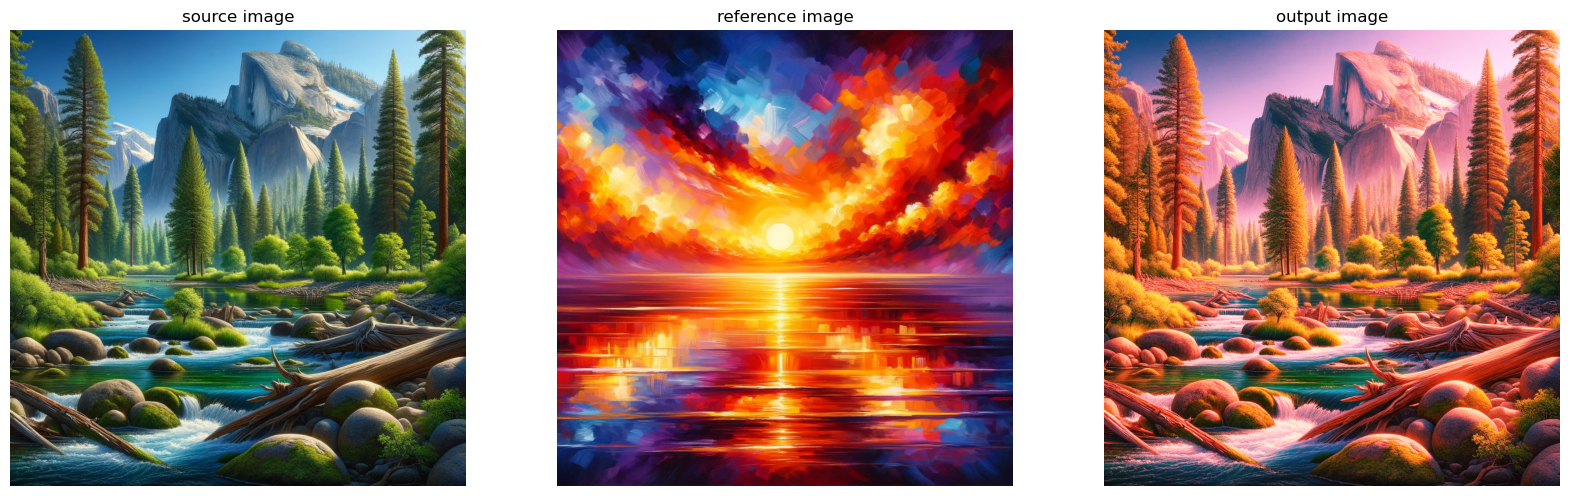

In [84]:
# Do not change this cell
src = cv2.imread('src.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

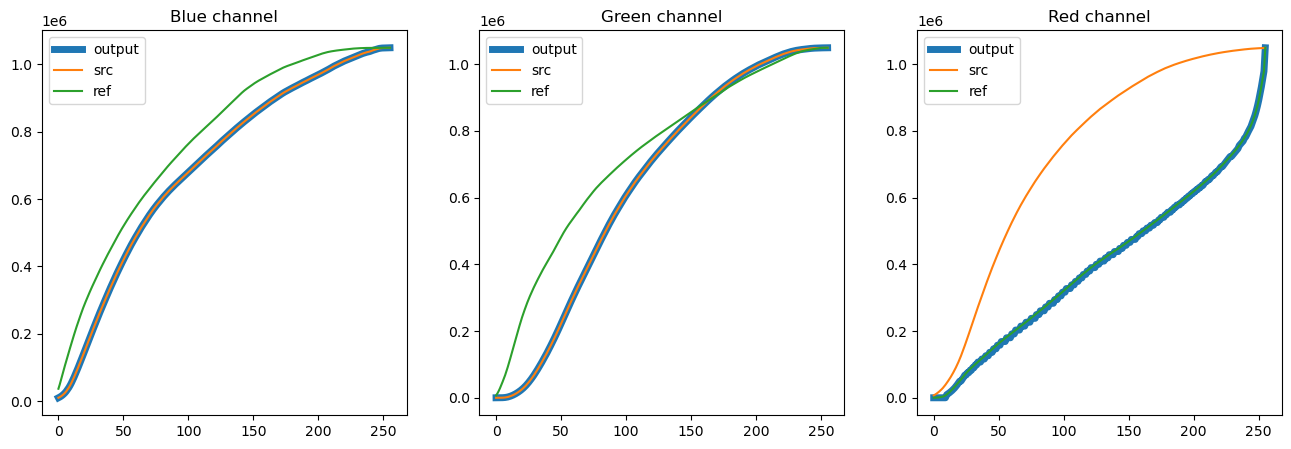

In [85]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output', linewidth = 5)
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)